## Семинар №2

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from typing import List
from tqdm import tqdm

%matplotlib inline

## Данные с датасета T-ECD


датасет от Т-Банка: https://huggingface.co/datasets/t-tech/T-ECD 

In [5]:
from huggingface_hub import snapshot_download

snapshot_download(
    repo_id="t-tech/T-ECD",
    repo_type="dataset",
    local_dir=".",
    local_dir_use_symlinks=False,
    allow_patterns="dataset/small/retail/events/**"
)

Fetching 227 files:   0%|          | 0/227 [00:00<?, ?it/s]/Users/o.a.lashinin/miniforge3/envs/implicit-env/lib/python3.11/site-packages/huggingface_hub/file_download.py:982: UserWarning: `local_dir_use_symlinks` parameter is deprecated and will be ignored. The process to download files to a local folder has been updated and do not rely on symlinks anymore. You only need to pass a destination folder as`local_dir`.
For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/download#download-files-to-local-folder.
  warnings.warn(
Fetching 227 files: 100%|██████████| 227/227 [04:29<00:00,  1.19s/it]


'/Users/o.a.lashinin/Downloads/RecSys_course/week02'

In [2]:
import polars as pl 
import os 

path = os.path.join('dataset/small/retail/events/')
files = os.listdir(path)
files[:5]

['01190.pq', '01201.pq', '01250.pq', '01132.pq', '01163.pq']

In [3]:
df = pl.read_parquet([path + x for x in files])
df.head()

timestamp,user_id,item_id,subdomain,action_type,os
duration[μs],u64,str,str,str,str
1190d 48635µs,77684264,"""fmcg_1151996""","""catalog""","""view""","""android"""
1190d 180276µs,10655625,"""fmcg_822400""","""catalog""","""view""","""android"""
1190d 316343µs,69196445,"""fmcg_984576""","""catalog""","""view""","""android"""
1190d 399745µs,78828332,"""fmcg_524168""","""catalog""","""view""","""android"""
1190d 609261µs,84114016,"""fmcg_435674""","""catalog""","""view""","""android"""


In [4]:
df['user_id'].n_unique(), df['item_id'].n_unique()

(122569, 250171)

In [5]:
df['action_type'].value_counts()

action_type,count
str,u32
"""view""",230484507
"""click""",2235957
"""added-to-cart""",3758762


In [6]:
df['timestamp'].min(), df['timestamp'].max()

(datetime.timedelta(days=1082, microseconds=326593),
 datetime.timedelta(days=1308, seconds=86399, microseconds=976424))

In [7]:
df = df.filter(pl.col('action_type') == 'added-to-cart')
df.head()

timestamp,user_id,item_id,subdomain,action_type,os
duration[μs],u64,str,str,str,str
1190d 7s 288114µs,36116174,"""fmcg_451209""","""search""","""added-to-cart""","""ios"""
1190d 11s 960764µs,22433763,"""fmcg_165265""","""search""","""added-to-cart""","""ios"""
1190d 13s 38687µs,82068435,"""fmcg_283923""","""search""","""added-to-cart""","""android"""
1190d 16s 186221µs,30751337,"""fmcg_246535""","""search""","""added-to-cart""","""ios"""
1190d 22s 510027µs,52944128,"""fmcg_421943""","""catalog""","""added-to-cart""","""ios"""


In [8]:
df['user_id'].n_unique(), df['item_id'].n_unique()

(87014, 140897)

In [9]:
df = df.with_columns(
    pl.col("timestamp")
      .dt.total_days()
      .cast(pl.Int64)
      .alias("timestamp")
)
df.head()

timestamp,user_id,item_id,subdomain,action_type,os
i64,u64,str,str,str,str
1190,36116174,"""fmcg_451209""","""search""","""added-to-cart""","""ios"""
1190,22433763,"""fmcg_165265""","""search""","""added-to-cart""","""ios"""
1190,82068435,"""fmcg_283923""","""search""","""added-to-cart""","""android"""
1190,30751337,"""fmcg_246535""","""search""","""added-to-cart""","""ios"""
1190,52944128,"""fmcg_421943""","""catalog""","""added-to-cart""","""ios"""


In [10]:
df = df.with_columns(pl.col('timestamp') - pl.col('timestamp').min())
df.head()

timestamp,user_id,item_id,subdomain,action_type,os
i64,u64,str,str,str,str
108,36116174,"""fmcg_451209""","""search""","""added-to-cart""","""ios"""
108,22433763,"""fmcg_165265""","""search""","""added-to-cart""","""ios"""
108,82068435,"""fmcg_283923""","""search""","""added-to-cart""","""android"""
108,30751337,"""fmcg_246535""","""search""","""added-to-cart""","""ios"""
108,52944128,"""fmcg_421943""","""catalog""","""added-to-cart""","""ios"""


In [11]:
df['timestamp'].max(), df['timestamp'].min()

(226, 0)

## Popular bias

/var/folders/gw/9vsxt6xx1t39l8d2vg28flr00000gq/T/ipykernel_74126/2125223136.py:5: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias("count")


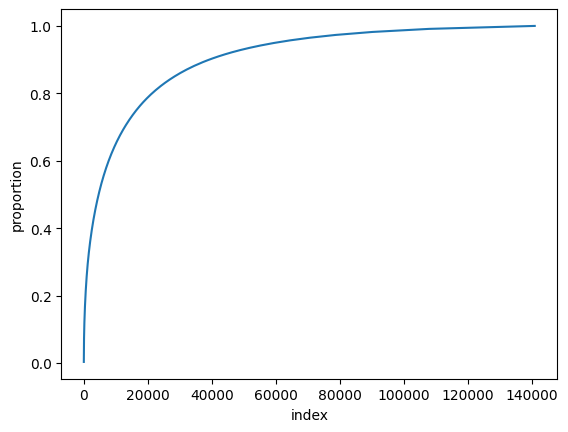

In [12]:

import matplotlib.pyplot as plt

# 1. Считаем количество каждого item_id
g = df.group_by("item_id").agg(
    pl.count().alias("count")
).sort("count", descending=True)

# 2. Преобразуем к numpy/pandas для cumsum (легко)
counts = g["count"].to_numpy()
cumsum = counts.cumsum()
proportion = cumsum / counts.sum()

# 3. Индекс
index = range(len(counts))

# 4. Визуализация
plt.plot(index, proportion)
plt.xlabel("index")
plt.ylabel("proportion")
plt.show()


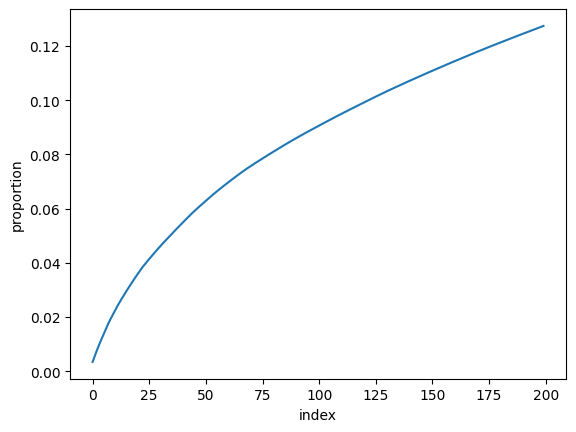

In [13]:
# 3. Индекс
index = range(len(counts))

# 4. Визуализация
plt.plot(index[:200], proportion[:200])
plt.xlabel("index")
plt.ylabel("proportion")
plt.show()

## Популярность айтема по времени

/var/folders/gw/9vsxt6xx1t39l8d2vg28flr00000gq/T/ipykernel_74126/1708556975.py:6: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  popular_items = df.group_by("item_id").agg(pl.count()).sort("count", descending=True)


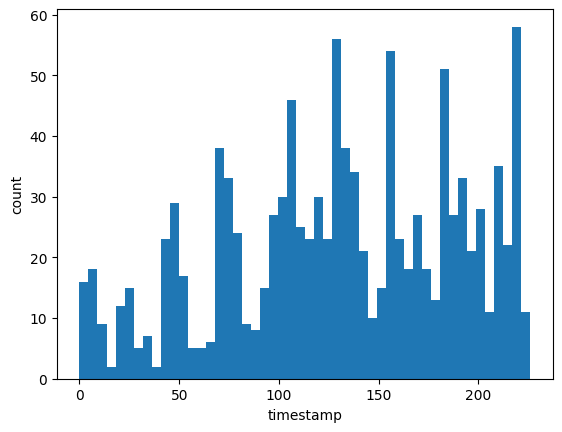

In [21]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

# 1. Топ-300 популярных item_id
popular_items = df.group_by("item_id").agg(pl.count()).sort("count", descending=True)
popular_items = popular_items["item_id"][:300].to_list()

# 2. Случайный выбор
sampled_id = np.random.choice(popular_items)

# 3. Выборка взаимодействий для выбранного item
interactions = df.filter(pl.col("item_id") == sampled_id)

# 4. Визуализация гистограммы last_watch_dt
plt.hist(interactions["timestamp"].to_numpy(), bins=50)
plt.xlabel("timestamp")
plt.ylabel("count")
plt.show()

In [22]:
# 1. Максимальная дата last_watch_dt для каждого item_id
temp = (
    df.group_by("item_id")
      .agg(pl.col("timestamp").max().alias("timestamp"))
)

# 2. Оставляем только популярные item_id
temp = temp.filter(pl.col("item_id").is_in(popular_items))

# 3. Сортировка по last_watch_dt
temp = temp.sort("timestamp")

# 4. Просмотр первых строк
print(temp.head(10))

shape: (10, 2)
┌─────────────┬───────────┐
│ item_id     ┆ timestamp │
│ ---         ┆ ---       │
│ str         ┆ i64       │
╞═════════════╪═══════════╡
│ fmcg_172933 ┆ 136       │
│ fmcg_586469 ┆ 172       │
│ fmcg_546035 ┆ 173       │
│ fmcg_737582 ┆ 195       │
│ fmcg_283923 ┆ 207       │
│ fmcg_367433 ┆ 210       │
│ fmcg_251919 ┆ 213       │
│ fmcg_405572 ┆ 214       │
│ fmcg_562917 ┆ 220       │
│ fmcg_592380 ┆ 220       │
└─────────────┴───────────┘


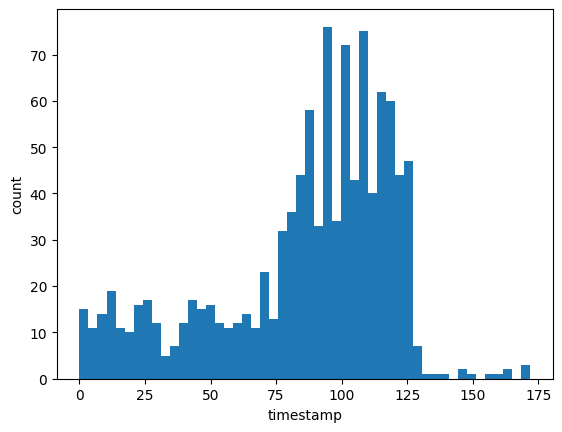

In [23]:
# interactions = df.loc[df.item_id==7107].copy()
# interactions.last_watch_dt.hist()

temp = df.filter(pl.col('item_id') == 'fmcg_586469')


# 4. Визуализация гистограммы last_watch_dt
plt.hist(temp["timestamp"].to_numpy(), bins=50)
plt.xlabel("timestamp")
plt.ylabel("count")
plt.show()

Этот айтем не встретится в тесте скорее всего, хоть он и популярный.

## Сделаем протокол тестирования

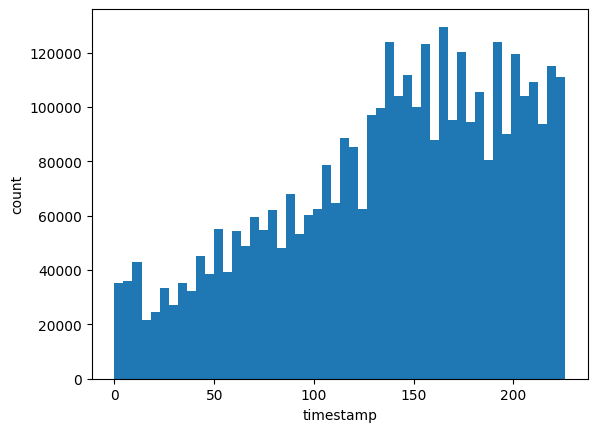

In [24]:
plt.hist(df["timestamp"].to_numpy(), bins=50)
plt.xlabel("timestamp")
plt.ylabel("count")
plt.show()

In [25]:
max_timestamp = df['timestamp'].max()
train_df = df.filter(pl.col("timestamp") < max_timestamp - 7)
test_df = df.filter(pl.col("timestamp") >= max_timestamp - 7)

train_users = train_df.select(pl.col("user_id").unique()).to_numpy().flatten()
test_users = test_df.select(pl.col("user_id").unique()).to_numpy().flatten()

all_included = np.intersect1d(train_users, test_users)

print('число людей и там и там: ', all_included.shape[0])
print('число людей всего:', train_users.shape[0])

число людей и там и там:  8561
число людей всего: 84476


In [26]:
len(set(test_users) - set(train_users)) / len(test_users)

0.22866924948193532

## Теперь переведем к соединенному датасету все

In [27]:
import polars as pl
import numpy as np

n_users = 5000
all_included = pl.Series(np.random.choice(all_included, size=n_users, replace=False))

train_df = train_df.filter(pl.col("user_id").is_in(all_included))
test_df = test_df.filter(pl.col("user_id").is_in(all_included))

assert train_df.select(pl.col("timestamp").max()).item() < test_df.select(pl.col("timestamp").min()).item()
assert train_df.select(pl.col("user_id").n_unique()).item() == n_users
assert test_df.select(pl.col("user_id").n_unique()).item() == n_users


In [28]:
train_df.head()

timestamp,user_id,item_id,subdomain,action_type,os
i64,u64,str,str,str,str
108,22433763,"""fmcg_165265""","""search""","""added-to-cart""","""ios"""
108,30751337,"""fmcg_246535""","""search""","""added-to-cart""","""ios"""
108,30751337,"""fmcg_188032""","""search""","""added-to-cart""","""ios"""
108,36812940,"""fmcg_319165""","""search""","""added-to-cart""","""android"""
108,46597486,"""fmcg_790065""","""search""","""added-to-cart""","""ios"""


In [29]:
import polars as pl

# Предположим, что train_df и test_df — это Polars DataFrames
# Если они пока pandas, можно сначала конвертнуть:
# train_df = pl.from_pandas(train_df)
# test_df = pl.from_pandas(test_df)

# Функция для группировки и сортировки
def group_interactions(df, item_col="item_id", time_col="timestamp"):
    return (
        df.sort([pl.col("user_id"), pl.col(time_col)])  # сначала сортируем по пользователю и времени
          .group_by("user_id")
          .agg(
              pl.struct([pl.col(item_col), pl.col(time_col)]).alias("interactions")
          )
    )

train_grouped = group_interactions(train_df).rename({"interactions": "train_interactions"})
test_grouped = group_interactions(test_df).rename({"interactions": "test_interactions"})

train_grouped.head()


user_id,train_interactions
u64,list[struct[2]]
16394,"[{""fmcg_673372"",59}, {""fmcg_694882"",59}, … {""fmcg_905539"",215}]"
21623,"[{""fmcg_368528"",209}, {""fmcg_438871"",213}, … {""fmcg_34622"",216}]"
24455,"[{""fmcg_794363"",136}, {""fmcg_229742"",137}, … {""fmcg_68229"",217}]"
35920,"[{""fmcg_579604"",47}, {""fmcg_597323"",51}, … {""fmcg_1146668"",209}]"
37567,"[{""fmcg_688497"",181}, {""fmcg_1068993"",181}, … {""fmcg_776954"",181}]"


In [30]:
joined = train_grouped.join(test_grouped, on=['user_id'])
joined.head()

user_id,train_interactions,test_interactions
u64,list[struct[2]],list[struct[2]]
16394,"[{""fmcg_673372"",59}, {""fmcg_694882"",59}, … {""fmcg_905539"",215}]","[{""fmcg_78224"",221}, {""fmcg_1134189"",221}, … {""fmcg_1150084"",225}]"
21623,"[{""fmcg_368528"",209}, {""fmcg_438871"",213}, … {""fmcg_34622"",216}]","[{""fmcg_887286"",220}, {""fmcg_836977"",220}, … {""fmcg_582118"",220}]"
24455,"[{""fmcg_794363"",136}, {""fmcg_229742"",137}, … {""fmcg_68229"",217}]","[{""fmcg_431295"",222}, {""fmcg_625555"",222}, … {""fmcg_743193"",222}]"
35920,"[{""fmcg_579604"",47}, {""fmcg_597323"",51}, … {""fmcg_1146668"",209}]","[{""fmcg_1001989"",225}, {""fmcg_691983"",225}, … {""fmcg_136997"",225}]"
37567,"[{""fmcg_688497"",181}, {""fmcg_1068993"",181}, … {""fmcg_776954"",181}]","[{""fmcg_502177"",226}, {""fmcg_50133"",226}, … {""fmcg_272019"",226}]"


In [31]:
def ndcg_metric(gt_items, predicted):
    
    at = len(predicted)
    relevance = np.array([1 if x in predicted else 0 for x in gt_items])
    # DCG uses the relevance of the recommended items
    rank_dcg = dcg(relevance)

    if rank_dcg == 0.0:
        return 0.0

    # IDCG has all relevances to 1 (or the values provided), up to the number of items in the test set that can fit in the list length
    ideal_dcg = dcg(np.sort(relevance)[::-1][:at])

    if ideal_dcg == 0.0:
        return 0.0

    ndcg_ = rank_dcg / ideal_dcg

    return ndcg_


def dcg(scores):
    return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
                  dtype=np.float64)


def recall_metric(gt_items, predicted):
    
    n_gt = len(gt_items)
    intersection = len(set(gt_items).intersection(set(predicted)))
    return intersection / n_gt



def evaluate_recommender(df, model_preds, gt_col='test_interactions', topn=100):
    
    metric_values = []
    
    for  row in df.iter_rows(named=True):
        gt_items = [x['item_id'] for x in row[gt_col]]
        metric_values.append((ndcg_metric(gt_items, row[model_preds][:topn]),
                              recall_metric(gt_items, row[model_preds][:topn])))
        
    return {'ndcg':np.mean([x[0] for x in metric_values]),
            'recall':np.mean([x[1] for x in metric_values])}
            


In [32]:
import polars as pl

def get_metrics(df: pl.DataFrame, model_preds_col: str, gt_col='test_interactions', topn=10):
    """
    df: Polars DataFrame с колонками:
        - gt_col: список кортежей (item_id, timestamp)
        - model_preds_col: список item_id предсказаний
    Возвращает: список кортежей (ndcg, recall) для каждой строки
    """

    def row_metrics(gt_list, pred_list):
        # gt_list — список структур Polars, нужно взять только item_id
        gt_items = [x[gt_col_name] if isinstance(x, dict) else x[0] for x in gt_list]
        return (ndcg_metric(gt_items, pred_list),
                recall_metric(gt_items, pred_list))

    gt_col_name = gt_col  # для обращения к полям struct

    # Полярс Apply через Struct или List
    result = df.with_columns(
        pl.struct([pl.col(gt_col), pl.col(model_preds_col)])
          .apply(lambda x: row_metrics(x[gt_col], x[model_preds_col]))
          .alias("metrics")
    )

    return result["metrics"].to_list()


In [34]:
class Random:

    def __init__(self):

        self.trained = False

    def fit(self, df, col='train_interactions'):

        items = set()
        for row in df.iter_rows(named=True):
            for x in row[col]:
                items.add(x['item_id'])

        self.items = list(items)
        self.trained = True

    def predict(self, df, topn=300):
        assert self.trained
        return [np.random.choice(self.items, replace=False, size=topn)]*len(df)


random = Random()
random.fit(joined)

random_recs = random.predict(joined, topn=300)
joined = joined.with_columns(pl.Series(name='random_recs', values=random_recs))

joined.head()  

user_id,train_interactions,test_interactions,random_recs
u64,list[struct[2]],list[struct[2]],"array[str, 300]"
16394,"[{""fmcg_673372"",59}, {""fmcg_694882"",59}, … {""fmcg_905539"",215}]","[{""fmcg_78224"",221}, {""fmcg_1134189"",221}, … {""fmcg_1150084"",225}]","[""fmcg_331302"", ""fmcg_341112"", … ""fmcg_782471""]"
21623,"[{""fmcg_368528"",209}, {""fmcg_438871"",213}, … {""fmcg_34622"",216}]","[{""fmcg_887286"",220}, {""fmcg_836977"",220}, … {""fmcg_582118"",220}]","[""fmcg_331302"", ""fmcg_341112"", … ""fmcg_782471""]"
24455,"[{""fmcg_794363"",136}, {""fmcg_229742"",137}, … {""fmcg_68229"",217}]","[{""fmcg_431295"",222}, {""fmcg_625555"",222}, … {""fmcg_743193"",222}]","[""fmcg_331302"", ""fmcg_341112"", … ""fmcg_782471""]"
35920,"[{""fmcg_579604"",47}, {""fmcg_597323"",51}, … {""fmcg_1146668"",209}]","[{""fmcg_1001989"",225}, {""fmcg_691983"",225}, … {""fmcg_136997"",225}]","[""fmcg_331302"", ""fmcg_341112"", … ""fmcg_782471""]"
37567,"[{""fmcg_688497"",181}, {""fmcg_1068993"",181}, … {""fmcg_776954"",181}]","[{""fmcg_502177"",226}, {""fmcg_50133"",226}, … {""fmcg_272019"",226}]","[""fmcg_331302"", ""fmcg_341112"", … ""fmcg_782471""]"


In [35]:
evaluate_recommender(joined, model_preds='random_recs')

{'ndcg': 0.008063477833912236, 'recall': 0.0014598998365326857}

In [36]:
from typing import List
import polars as pl
import numpy as np


class TopPopular:

    def __init__(self):
        self.trained = False
        self.recommendations = None

    def fit(self, df: pl.DataFrame, col: str = "train_interactions"):
        """
        df[col] : List[Struct[item_id, last_watch_dt]]
        """

        counts = (
            df
            .select(pl.col(col))
            .explode(col)                                # -> Struct(item_id, last_watch_dt)
            .select(pl.col(col).struct.field("item_id"))
            .group_by("item_id")
            .count()
            .sort("count", descending=True)
        )

        self.recommendations = counts["item_id"].to_list()
        self.trained = True

    def predict(self, df: pl.DataFrame, topn: int = 300) -> List[np.ndarray]:
        assert self.trained
        recs = np.array(self.recommendations[:topn])
        return [recs] * len(df)
    

toppop = TopPopular()
toppop.fit(joined)

joined = joined.with_columns(
    pl.Series(
        name="toppopular_recs",
        values=toppop.predict(joined)
    )
)

joined.head()



/var/folders/gw/9vsxt6xx1t39l8d2vg28flr00000gq/T/ipykernel_74126/1980506104.py:23: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  .count()


user_id,train_interactions,test_interactions,random_recs,toppopular_recs
u64,list[struct[2]],list[struct[2]],"array[str, 300]","array[str, 300]"
16394,"[{""fmcg_673372"",59}, {""fmcg_694882"",59}, … {""fmcg_905539"",215}]","[{""fmcg_78224"",221}, {""fmcg_1134189"",221}, … {""fmcg_1150084"",225}]","[""fmcg_331302"", ""fmcg_341112"", … ""fmcg_782471""]","[""fmcg_561593"", ""fmcg_335947"", … ""fmcg_769540""]"
21623,"[{""fmcg_368528"",209}, {""fmcg_438871"",213}, … {""fmcg_34622"",216}]","[{""fmcg_887286"",220}, {""fmcg_836977"",220}, … {""fmcg_582118"",220}]","[""fmcg_331302"", ""fmcg_341112"", … ""fmcg_782471""]","[""fmcg_561593"", ""fmcg_335947"", … ""fmcg_769540""]"
24455,"[{""fmcg_794363"",136}, {""fmcg_229742"",137}, … {""fmcg_68229"",217}]","[{""fmcg_431295"",222}, {""fmcg_625555"",222}, … {""fmcg_743193"",222}]","[""fmcg_331302"", ""fmcg_341112"", … ""fmcg_782471""]","[""fmcg_561593"", ""fmcg_335947"", … ""fmcg_769540""]"
35920,"[{""fmcg_579604"",47}, {""fmcg_597323"",51}, … {""fmcg_1146668"",209}]","[{""fmcg_1001989"",225}, {""fmcg_691983"",225}, … {""fmcg_136997"",225}]","[""fmcg_331302"", ""fmcg_341112"", … ""fmcg_782471""]","[""fmcg_561593"", ""fmcg_335947"", … ""fmcg_769540""]"
37567,"[{""fmcg_688497"",181}, {""fmcg_1068993"",181}, … {""fmcg_776954"",181}]","[{""fmcg_502177"",226}, {""fmcg_50133"",226}, … {""fmcg_272019"",226}]","[""fmcg_331302"", ""fmcg_341112"", … ""fmcg_782471""]","[""fmcg_561593"", ""fmcg_335947"", … ""fmcg_769540""]"


In [37]:
evaluate_recommender(joined, model_preds='toppopular_recs')

{'ndcg': 0.23789538072553032, 'recall': 0.062877364971333}

## Теперь выкинем айтемы, которые не показывались в момент перед тестом

In [38]:
max_timestamp - 7

219

In [39]:
validated_itmes = train_df.filter(pl.col('timestamp') > max_timestamp - 14)['item_id'].to_numpy()
len(validated_itmes)

50355

In [40]:
from typing import List
import polars as pl
import numpy as np


class ActualTopPopular(TopPopular):

    def __init__(self):
        self.trained = False

    def predict(
        self,
        df: pl.DataFrame,
        only_items,
        topn: int = 300
    ) -> List[np.ndarray]:

        assert self.trained

        only_items = set(only_items)
        recs = self.recommendations  # уже отсортированный global top

        def user_recs(train_interactions):
            user_items = {x["item_id"] for x in train_interactions}

            out = []
            for item in recs:
                if item in only_items:
                    out.append(item)
                if len(out) == topn:
                    break

            return np.array(out)

        return (
            df
            .select("train_interactions")
            .to_series()
            .map_elements(user_recs)
            .to_list()
        )

toppop = ActualTopPopular()
toppop.fit(joined)

joined = joined.with_columns(
    pl.Series(
        name="actual_toppop",
        values=toppop.predict(joined, only_items=validated_itmes)
    )
)

joined.head()


/var/folders/gw/9vsxt6xx1t39l8d2vg28flr00000gq/T/ipykernel_74126/1980506104.py:23: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  .count()
/var/folders/gw/9vsxt6xx1t39l8d2vg28flr00000gq/T/ipykernel_74126/432609948.py:39: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  .map_elements(user_recs)


user_id,train_interactions,test_interactions,random_recs,toppopular_recs,actual_toppop
u64,list[struct[2]],list[struct[2]],"array[str, 300]","array[str, 300]","array[str, 300]"
16394,"[{""fmcg_673372"",59}, {""fmcg_694882"",59}, … {""fmcg_905539"",215}]","[{""fmcg_78224"",221}, {""fmcg_1134189"",221}, … {""fmcg_1150084"",225}]","[""fmcg_331302"", ""fmcg_341112"", … ""fmcg_782471""]","[""fmcg_561593"", ""fmcg_335947"", … ""fmcg_769540""]","[""fmcg_561593"", ""fmcg_335947"", … ""fmcg_338012""]"
21623,"[{""fmcg_368528"",209}, {""fmcg_438871"",213}, … {""fmcg_34622"",216}]","[{""fmcg_887286"",220}, {""fmcg_836977"",220}, … {""fmcg_582118"",220}]","[""fmcg_331302"", ""fmcg_341112"", … ""fmcg_782471""]","[""fmcg_561593"", ""fmcg_335947"", … ""fmcg_769540""]","[""fmcg_561593"", ""fmcg_335947"", … ""fmcg_338012""]"
24455,"[{""fmcg_794363"",136}, {""fmcg_229742"",137}, … {""fmcg_68229"",217}]","[{""fmcg_431295"",222}, {""fmcg_625555"",222}, … {""fmcg_743193"",222}]","[""fmcg_331302"", ""fmcg_341112"", … ""fmcg_782471""]","[""fmcg_561593"", ""fmcg_335947"", … ""fmcg_769540""]","[""fmcg_561593"", ""fmcg_335947"", … ""fmcg_338012""]"
35920,"[{""fmcg_579604"",47}, {""fmcg_597323"",51}, … {""fmcg_1146668"",209}]","[{""fmcg_1001989"",225}, {""fmcg_691983"",225}, … {""fmcg_136997"",225}]","[""fmcg_331302"", ""fmcg_341112"", … ""fmcg_782471""]","[""fmcg_561593"", ""fmcg_335947"", … ""fmcg_769540""]","[""fmcg_561593"", ""fmcg_335947"", … ""fmcg_338012""]"
37567,"[{""fmcg_688497"",181}, {""fmcg_1068993"",181}, … {""fmcg_776954"",181}]","[{""fmcg_502177"",226}, {""fmcg_50133"",226}, … {""fmcg_272019"",226}]","[""fmcg_331302"", ""fmcg_341112"", … ""fmcg_782471""]","[""fmcg_561593"", ""fmcg_335947"", … ""fmcg_769540""]","[""fmcg_561593"", ""fmcg_335947"", … ""fmcg_338012""]"


In [42]:
evaluate_recommender(joined, model_preds='actual_toppop')

{'ndcg': 0.23789538072553032, 'recall': 0.062877364971333}

In [43]:
evaluate_recommender(joined, model_preds='toppopular_recs')

{'ndcg': 0.23789538072553032, 'recall': 0.062877364971333}

## Сработает ли тут Toppersonal?

In [44]:
df.group_by(['user_id','item_id']).agg(pl.col('timestamp').len())

user_id,item_id,timestamp
u64,str,u32
44004779,"""fmcg_654189""",1
18253345,"""fmcg_37322""",1
10571383,"""fmcg_297363""",1
20433205,"""fmcg_28867""",1
63719414,"""fmcg_730360""",1
…,…,…
74164183,"""fmcg_42442""",1
614191,"""fmcg_557115""",3
82176019,"""fmcg_711327""",1


## Построим EASE

In [45]:
item_counts = train_df.group_by(['item_id']).agg(pl.col('user_id').len()).sort(by='user_id', descending=True)
item_counts = item_counts[:5000]
item_counts.head()


item_id,user_id
str,u32
"""fmcg_561593""",2075
"""fmcg_335947""",1701
"""fmcg_651828""",1607
"""fmcg_142040""",1333
"""fmcg_514296""",1256


In [46]:
print(train_df.shape)
train_df = train_df.join(item_counts, on='item_id', how='inner')
print(train_df.shape)

(733434, 6)
(393755, 7)


In [47]:
import polars as pl

# если train_df пока pandas
# train_df = pl.from_pandas(train_df)

# item_id ↔ id
item2id = {k: v for v, k in enumerate(train_df["item_id"].unique())}
id2item = {v: k for k, v in item2id.items()}

# user_id ↔ id
user2id = {k: v for v, k in enumerate(train_df["user_id"].unique())}
id2user = {v: k for k, v in user2id.items()}

# замена значений
train_df = train_df.with_columns(
    pl.col("user_id").replace(user2id),
    pl.col("item_id").replace(item2id),
)

train_df.sample(5)


timestamp,user_id,item_id,subdomain,action_type,os,user_id_right
i64,u64,str,str,str,str,u32
138,2084,"""1955""","""main""","""added-to-cart""","""android""",136
76,4786,"""972""","""catalog""","""added-to-cart""","""ios""",51
25,2706,"""3910""","""search""","""added-to-cart""","""android""",66
46,1418,"""3841""","""search""","""added-to-cart""","""android""",136
203,3860,"""1619""","""search""","""added-to-cart""","""ios""",60


In [48]:
train_df = train_df[['user_id','item_id']].unique()

In [50]:
from scipy import sparse as sps

matrix = sps.coo_matrix(
    (np.ones(train_df.shape[0]), (train_df['user_id'], train_df['item_id'])),
    shape=(len(user2id), len(item2id)),
)
matrix

<COOrdinate sparse matrix of dtype 'float64'
	with 248879 stored elements and shape (4911, 5000)>

In [51]:
%%time

# Обучаем конечную модель
# Мы взяли реализацию из RecBole
# 
def fit_ease(X, reg_weight=100):
    
    # gram matrix
    G = X.T @ X

    # add reg to diagonal
    G += reg_weight * sps.identity(G.shape[0])

    # convert to dense because inverse will be dense
    G = G.todense()

    # invert. this takes most of the time
    P = np.linalg.inv(G)
    B = P / (-np.diag(P))
    # zero out diag
    np.fill_diagonal(B, 0.)
    
    return B

w = fit_ease(matrix)

CPU times: user 12.9 s, sys: 1.87 s, total: 14.8 s
Wall time: 1.81 s


In [52]:
w.shape

(5000, 5000)

In [55]:

def get_preds_polars(x, item2id, id2item, w, topk=100):
    # x: list[tuple] или list[list], берем первый элемент

    user_items = [str(x['item_id']) for x in x.to_arrow()]
    # user_items = [t[0] for t in x.to_arrow()[0]]

    encoded = [item2id[t] for t in user_items if t in item2id]

    vector = np.zeros(len(item2id), dtype=np.float32)
    vector[encoded] = 1.0
    vector = sps.csr_matrix(vector)

    preds = np.asarray(vector.dot(w)).ravel()
    #preds[encoded] = -np.inf

    ranks = np.argsort(-preds)[:topk]

    return [id2item[i] for i in ranks]

import polars as pl

out = []
for x in joined["train_interactions"]:
    out.append(get_preds_polars(x, item2id, id2item, w))

joined = joined.with_columns(pl.Series(out).alias('ease_preds'))
joined.head()

user_id,train_interactions,test_interactions,random_recs,toppopular_recs,actual_toppop,ease_preds
u64,list[struct[2]],list[struct[2]],"array[str, 300]","array[str, 300]","array[str, 300]",list[str]
16394,"[{""fmcg_673372"",59}, {""fmcg_694882"",59}, … {""fmcg_905539"",215}]","[{""fmcg_78224"",221}, {""fmcg_1134189"",221}, … {""fmcg_1150084"",225}]","[""fmcg_331302"", ""fmcg_341112"", … ""fmcg_782471""]","[""fmcg_561593"", ""fmcg_335947"", … ""fmcg_769540""]","[""fmcg_561593"", ""fmcg_335947"", … ""fmcg_338012""]","[""fmcg_900292"", ""fmcg_1066208"", … ""fmcg_505750""]"
21623,"[{""fmcg_368528"",209}, {""fmcg_438871"",213}, … {""fmcg_34622"",216}]","[{""fmcg_887286"",220}, {""fmcg_836977"",220}, … {""fmcg_582118"",220}]","[""fmcg_331302"", ""fmcg_341112"", … ""fmcg_782471""]","[""fmcg_561593"", ""fmcg_335947"", … ""fmcg_769540""]","[""fmcg_561593"", ""fmcg_335947"", … ""fmcg_338012""]","[""fmcg_714802"", ""fmcg_903889"", … ""fmcg_880372""]"
24455,"[{""fmcg_794363"",136}, {""fmcg_229742"",137}, … {""fmcg_68229"",217}]","[{""fmcg_431295"",222}, {""fmcg_625555"",222}, … {""fmcg_743193"",222}]","[""fmcg_331302"", ""fmcg_341112"", … ""fmcg_782471""]","[""fmcg_561593"", ""fmcg_335947"", … ""fmcg_769540""]","[""fmcg_561593"", ""fmcg_335947"", … ""fmcg_338012""]","[""fmcg_942454"", ""fmcg_696734"", … ""fmcg_57274""]"
35920,"[{""fmcg_579604"",47}, {""fmcg_597323"",51}, … {""fmcg_1146668"",209}]","[{""fmcg_1001989"",225}, {""fmcg_691983"",225}, … {""fmcg_136997"",225}]","[""fmcg_331302"", ""fmcg_341112"", … ""fmcg_782471""]","[""fmcg_561593"", ""fmcg_335947"", … ""fmcg_769540""]","[""fmcg_561593"", ""fmcg_335947"", … ""fmcg_338012""]","[""fmcg_446059"", ""fmcg_511864"", … ""fmcg_1133302""]"
37567,"[{""fmcg_688497"",181}, {""fmcg_1068993"",181}, … {""fmcg_776954"",181}]","[{""fmcg_502177"",226}, {""fmcg_50133"",226}, … {""fmcg_272019"",226}]","[""fmcg_331302"", ""fmcg_341112"", … ""fmcg_782471""]","[""fmcg_561593"", ""fmcg_335947"", … ""fmcg_769540""]","[""fmcg_561593"", ""fmcg_335947"", … ""fmcg_338012""]","[""fmcg_192505"", ""fmcg_39299"", … ""fmcg_412263""]"


In [56]:
evaluate_recommender(joined, model_preds='ease_preds') # lambda 100

{'ndcg': 0.38030497840116634, 'recall': 0.14611065904716183}

In [57]:
evaluate_recommender(joined, model_preds='toppopular_recs') # lambda 100

{'ndcg': 0.23789538072553032, 'recall': 0.062877364971333}